# Data Pre-Processing and Feature Engineering

**Data Pre-processing & Feature Engineering** is the second stage on any Machine Learning workflow, following the initial **Exploratory Data Analysis (EDA)**. This stage aims to prepare our data for the ML task at hand, make it suitable for the ML algorithm we will use and improve the predictive power of the model. When done properly, Data Pre-processing and Feature Engineering can ultimately **significantly optimise the performance of ML models by more than 10%** making it one of the most important stages of our workflows.

In this notebook, we cover:
- Introduce **Data Pre-processing with Scikit-Learn** in the form of *Numerical and Categorical Transformations*
- Build *Column Transformers using Scikit-Learn**
- Explore the **Fit-Transform Workflow**
- Tools for *Feature Selection*
- Application to a Regression Problem

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler, OneHotEncoder, Binarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer

### Simple Data Exploration and Linear Regression

In [2]:
# Load the dataset:

filepath = r'./Data/insurance_v1.csv'
df = pd.read_csv(filepath)
df.head(10)

,age,sex,children,smoker,region,height,weight,charges
0,19,female,0,yes,southwest,163.205209,74.314273,16884.92400
1,24,female,0,no,southwest,163.695584,60.559512,2457.50200
2,49,female,1,no,northwest,157.734039,56.253742,9566.99090
3,51,female,2,no,northwest,162.208934,96.485144,10848.13430
4,58,female,0,no,northwest,175.008617,102.420085,12231.61360
5,51,female,0,no,northeast,171.668128,119.824801,9875.68040
6,50,female,1,no,northeast,162.220190,71.248919,10106.13425
7,30,female,3,yes,southeast,168.782243,111.243475,40932.42950
8,29,female,1,yes,northeast,168.875148,62.042683,16657.71745
9,18,female,0,no,northeast,173.399885,121.111971,2217.60120


We can calculate the correlations between the numerical columns in the dataset, and visualise it in a `heatmap`. In this example, the variable that we are looking to predict is `charges` so we can visualise the strength of the correlations between the predictors and this target variable.

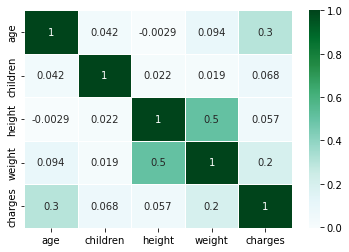

In [3]:
# Select only the numerical variables in the dataset
# and calculate their correlations
num_df = df[['age', 'children', 'height', 'weight', 'charges']]
num_corr_df = num_df.corr()

# Plot the correlations in the form of a heatmap 
sns.heatmap(num_corr_df, annot = True, cmap = 'BuGn', linewidths=0.5)
plt.show()


##### Conclusion:
 - The `charges` column has the *highest* correlation with `age`, followed by `weight`, however, the magnitude of these correlations is too small to claim significance
 - The correlation between `charges` and `children` or `height` is pretty much 0, which suggests that these features don't perform well in explaining the target column `charges`

---
#### Linear Regression:
We build a **Linear Regression** model, predicting medical charges:
- As features for the model, we only use the existing **numerical variables** - Ordinary Least Squares (OLS) Regression cannot handle categorical columns, which are not numerically encoded
- **Fit-Predict Workflow**:
    - split the data into train and test
    - fit model on train data
    - test model by making predictions on the test set
    - evaluate model performance
- Report the values of all Regression Performance Metrics - MAE, MSE, RMSE, Coefficient of Determination.

In [4]:
# Split data into features and target:
X = df[['age', 'height', 'weight', 'children']]
y = df['charges']

# Create a Training Dataset and Test Data set:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

# Create a linear Regression model:
LinearModel = LinearRegression()

# Fit the model
LinearModel.fit(X_train, y_train)

# Test the model
y_pred = LinearModel.predict(X_test)

# Evaluate the model performance
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2_SCORE = r2_score(y_test, y_pred)

# Report on the evaluation metrics
print(f'MSE is {MSE:.4f}')
print(f'RMSE is {MSE**0.5:.4f}')
print(f'MAE is {MAE:.4f}')
print(f'R-squared is {R2_SCORE:.4f}')


MSE is 142175552.2586
RMSE is 11923.7390
MAE is 9393.9926
R-squared is 0.0892



##### Interpretation:

 - Our model doesn't perform very well - with a RMSE of 11923, our predictions are on average more than 10,000 away from the true medical charge
 - The coefficient of determination ($R^2$) is positive but very close to zero, indicating that our current model is only marginally better than a constant prediction of the average charge in the training dataset

---
#### Importance of Feature Engineering: </font>
We can now **engineer and explore the impact of new features** on the Medical Charge Regression problem:
- Feature Engineer a **'bmi'** column - bmi is calculated as $\frac{weight}{height^2}$ for weight in kg, and height in metres (***NB: currently height is measured in cm, so you will need to adjust the formula***)
- Feature Engineer an **'obese'** column by binning the **'bmi'** values - obese = 1 if bmi >30, otherwise obese = 0
- Encode the **'smoker'** column - yes = 1, no = 0

In [5]:
# Feature Engineering 3 new features:
# 1) BMI
# 2) Obese 
# 3) Smoking (flag)

df['Smoker?'] = df['smoker'].map({'yes':1, 'no':0})
df['BMI'] = (df['weight']*10000)/(df['height']**2)
df['Obese'] = df['BMI'].map(lambda x: 1 if x>30 else 0)

df.head()

,age,sex,children,smoker,region,height,weight,charges,Smoker?,BMI,Obese
0,19,female,0,yes,southwest,163.205209,74.314273,16884.9240,1,27.90,0
1,24,female,0,no,southwest,163.695584,60.559512,2457.5020,0,22.60,0
2,49,female,1,no,northwest,157.734039,56.253742,9566.9909,0,22.61,0
3,51,female,2,no,northwest,162.208934,96.485144,10848.1343,0,36.67,1
4,58,female,0,no,northwest,175.008617,102.420085,12231.6136,0,33.44,1


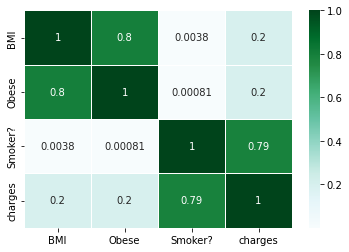

In [6]:
# Select only the numerical variables in the dataset
# and calculate their correlations
num_df = df[['BMI', 'Obese', 'Smoker?', 'charges']]
num_corr_df = num_df.corr()

# Plot the correlations in the form of a heatmap 
sns.heatmap(num_corr_df, annot = True, cmap = 'BuGn', linewidths=0.5)
plt.show()


##### Conclusion 
- The `charges` column has a *strong correlation* with `Smoker?` (which we simply had to integer encode)
- `charges` also has a positive correlation to `BMI` and `Obese`, but nowhere near as strong and the correlation `charge-smoker`

---
#### Linear Regression (with the new features)
Building a Linear Regression Model, this time using the new 3 features - `age`, `obese` and `smoker`:

In [7]:
# Split the data into features and target:
X = df[['age', 'Obese', 'Smoker?']]
y = df['charges']

# Create a Training Dataset and Test Data set:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

# Create a Linear Regression Model:
LinearModel2 = LinearRegression()

# 3) Fit model
LinearModel2.fit(X_train, y_train)

# 4) Test model
y_pred = LinearModel2.predict(X_test)

# 5) Evaluate model performance
MSE_fe = mean_squared_error(y_test, y_pred)
MAE_fe = mean_absolute_error(y_test, y_pred)
R2_SCORE_fe = r2_score(y_test, y_pred)

# 6) Report on the evaluation metrics
print(f'MSE is {MSE_fe:.4f}')
print(f'RMSE is {MSE_fe**0.5:.4f}')
print(f'MAE is {MAE_fe:.4f}')
print(f'R-squared is {R2_SCORE_fe:.4f}')


MSE is 32521334.3331
RMSE is 5702.7480
MAE is 4022.1589
R-squared is 0.7917


##### Interpretation:

- The model improved drastically which we can see from the $R^2$ value, which has been updated from under 0.1 to almost 0.8
- Additionally, the average root mean squared error dropped from over 11k to 5.7k (50% decrease)

---
We have seen a basic example of how a basic change in feature selection or engineering new features from the current data can help gather more insights about the data and also help to create a model with a higher predictable power.

We can now delve deeper into Pre-Processing the dataset to transform our data further to help generate more useful insights.

---
## Pre-Processing with Scikit-Learn:
- **Data Pre-Processing**is the practice of performing transformations, ensuring the dataset at hand is in a form, fit for purpose.
- We can explore how to perform the following transformations in *Scikit-Learn*, as Data Pre-processing with `sklearn` is much easier to integrate with the rest of the ML workflow
    - Binarisation
    - Min-Max Normalisation
    - Standardisation
    - Ordinal Encoding
    - One-Hot-Encoding

---
### Numerical Data - Binarization:
**Binarisation** is a technique, whereby we order numerical observations ascendingly, assign a threshold (or multiple thresholds) and group the observations in disjoint bins by comparing their values to those thresholds. Binarisation can be applied to both *discrete* and *continuous* numerical variables.

In `sklearn`, we perform Binarisation by:
- Creating an instance of the `Binarizer()` transformation class from `sklearn.preprocessing`
- Assigning the `threshold` argument to a given cut-off value
- Calling the `.fit()` method to the data we want to fit the transformer on
- Calling the `.transform()` method to the data we want transformed


In [8]:
# Binarizing the 'age' column in the dataset

# Select a threshold:
# We want to binarize age in two groups: Above or Below 50 years of age
threshold = 50

# Initialise a Binarizer instance, passing the defined threshold value
bin = Binarizer(threshold=threshold)

# Fit the data, based on which the Binarizer will work
X = df[['age']]
bin.fit(X)

# Transform the data with the Binarizer, storing the transformed 
# version of the data in a separate column
df['age_bin'] = bin.transform(X)
df.head()

,age,sex,children,smoker,region,height,weight,charges,Smoker?,BMI,Obese,age_bin
0,19,female,0,yes,southwest,163.205209,74.314273,16884.9240,1,27.90,0,0
1,24,female,0,no,southwest,163.695584,60.559512,2457.5020,0,22.60,0,0
2,49,female,1,no,northwest,157.734039,56.253742,9566.9909,0,22.61,0,0
3,51,female,2,no,northwest,162.208934,96.485144,10848.1343,0,36.67,1,1
4,58,female,0,no,northwest,175.008617,102.420085,12231.6136,0,33.44,1,1


---
### Numerical Data - Min-Max Normalization:
**Min-Max Normalisation** is a technique, whereby we rescale the numerical variable, so that its values fall in the $[0,1]$ range. The highest observed value is assigned the value = 1, and the lowest = 0. The formula used for the normalisation is:
$$   
\text{Min-Max Normalisation} = \frac{\text{value} - \text{min value}}{\text{max value} - \text{min value}}
$$


In `sklearn`, we perform Min-Max Normalization by:
- Creating an instance of the `MinMaxScaler()` transformation class from `sklearn.preprocessing`
- Calling the `.fit()` method to the data we want to fit the transformer on - at this stage the transformer *learns the minimum and maximum values*, used in the above formula
- Calling the `.transform()` method to the data we want transformed

In [9]:
# Min-Max Normalization on the 'height' column in the dataset

# Initialise a MinMaxScaler instance:
MinMax = MinMaxScaler()

# Fit the transformer to the data:
# The transformer learns the min and max value of the variable
X = df[['height']]
MinMax.fit(X)

# 4) Transform the data with the MinMaxScaler,
# Storing the transformed version of the data in a separate column
# At this stage, the transformer uses the learnt min and max values from the .fit() stage
df['height_normalized'] = MinMax.transform(X)
df.head()

,age,sex,children,smoker,region,height,weight,charges,Smoker?,BMI,Obese,age_bin,height_normalized
0,19,female,0,yes,southwest,163.205209,74.314273,16884.9240,1,27.90,0,0,0.298193
1,24,female,0,no,southwest,163.695584,60.559512,2457.5020,0,22.60,0,0,0.308396
2,49,female,1,no,northwest,157.734039,56.253742,9566.9909,0,22.61,0,0,0.184357
3,51,female,2,no,northwest,162.208934,96.485144,10848.1343,0,36.67,1,1,0.277464
4,58,female,0,no,northwest,175.008617,102.420085,12231.6136,0,33.44,1,1,0.543779


---
### Numerical Data - Standardisation (Z-Score Normalisation):
An alternative rescaling technique is **Standardisation**, whereby we rescale the numerical variable, so that is has a mean of 0 and a variance of 1 (unit-variance). The formula used for standardisation is:
$$   
\text{Standardisation} = \frac{\text{value} - \text{mean}}{\text{standard deviation}}
$$


In `sklearn`, we perform Standardisation by:
- Creating an instance of the `StandardScaler()` transformation class from `sklearn.preprocessing`
- Calling the `.fit()` method to the data we want to fit the transformer on - at this stage the transformer *learns the mean and standard deviation*, used in the above formula
- Calling the `.transform()` method to the data we want transformed


In [10]:
# Standardization on the 'weight' column in the dataset

# Initialise a StandardScaler() instance:
Standard_Scaler = StandardScaler()

# Fit the transformer to the data:
# The transformer learns the mean and standard deviation of the variable
X = df[['weight']]
Standard_Scaler.fit(X)

# 4) Transform the data with the StandardScaler:
# Storing the transformed version of the data in a separate column
# At this stage, the transformer uses the learnt mean and standard deviation values from the fit() stage
df['weight_scaled'] = Standard_Scaler.transform(X)
df.head()

,age,sex,children,smoker,region,height,weight,charges,Smoker?,BMI,Obese,age_bin,height_normalized,weight_scaled
0,19,female,0,yes,southwest,163.205209,74.314273,16884.9240,1,27.90,0,0,0.298193,-0.824120
1,24,female,0,no,southwest,163.695584,60.559512,2457.5020,0,22.60,0,0,0.308396,-1.474133
2,49,female,1,no,northwest,157.734039,56.253742,9566.9909,0,22.61,0,0,0.184357,-1.677613
3,51,female,2,no,northwest,162.208934,96.485144,10848.1343,0,36.67,1,1,0.277464,0.223616
4,58,female,0,no,northwest,175.008617,102.420085,12231.6136,0,33.44,1,1,0.543779,0.504086


---
### Categorical Data - Ordinal Encoding:
**Ordinal Encoding** is a technique, whereby we *translate categorical data into numbers (integers)*. Although it can be applied to both ordinal and norminal categorical variables, Ordinal Encoding (as the name suggests) is *best suited for ordinal categories* - these are categories which naturally follow a given hierarchy.

In `sklearn`, we perform Ordinal Encoding by:
- Creating an instance of the `OrdinalEncoder()` transformation class from `sklearn.preprocessing`
- Pass the list of possible categories as the value for the `categories` argument - the order of this list will be used to assign the integers (0 to the first category, 1 to the second category, etc.)
- Calling the `.fit()` method to the data we want to fit the transformer on
- Calling the `.transform()` method to the data we want transformed

In [11]:
# Ordinal Encoding on the 'smoker' column in the dataset

# Initialise a OrdinalEncoder() instance
Ordinal_Encoder = OrdinalEncoder(categories = [['no', 'yes']])

# Fit the transformer to the data
X = df[['smoker']]
Ordinal_Encoder.fit(X)

# Transform the data with the OrdinalEncoder,
df['smoker_encoded'] = Ordinal_Encoder.transform(X)
df.head()

,age,sex,children,smoker,region,height,weight,charges,Smoker?,BMI,Obese,age_bin,height_normalized,weight_scaled,smoker_encoded
0,19,female,0,yes,southwest,163.205209,74.314273,16884.9240,1,27.90,0,0,0.298193,-0.824120,1.0
1,24,female,0,no,southwest,163.695584,60.559512,2457.5020,0,22.60,0,0,0.308396,-1.474133,0.0
2,49,female,1,no,northwest,157.734039,56.253742,9566.9909,0,22.61,0,0,0.184357,-1.677613,0.0
3,51,female,2,no,northwest,162.208934,96.485144,10848.1343,0,36.67,1,1,0.277464,0.223616,0.0
4,58,female,0,no,northwest,175.008617,102.420085,12231.6136,0,33.44,1,1,0.543779,0.504086,0.0


---
### Categorical Data - One-Hot-Encoding:
**One-Hot-Encoding (OHE)** is a technique, whereby we translate *nominal categorical data* into *Binary (0/1) columns* - each category becomes a stand-alone column in the dataset. <font OHE thus allows us to translate unordered categories into numerical data *without introducing order and so bias to the data*.

In `sklearn`, we perform Ordinal Encoding by:
- Creating an instance of the `OneHotEncoder()` transformation class from `sklearn.preprocessing`
- By default, the OHE transformer produces a <font color=#14F278>**Sparse Matrix**</font> - a matrix, with majority of elements being 0
- Calling the `.fit()` method to the data we want to fit the transformer on
- Calling the `.transform()` method to the data we want transformed

In [12]:
# One-Hot-Encoding on the 'sex' column in the dataset

# Initialise the OneHotEncoder() instance:
OneHotEncoding = OneHotEncoder()

# Fit the transformer to the data
X = df[['sex']]
OneHotEncoding.fit(X)

# Transform the data with the OneHotEncoder 
# Note - the output of the transformation is a Sparse Matrix
OneHotEncoding.transform(X)

<1338x2 sparse matrix of type '<class 'numpy.float64'>'
	with 1338 stored elements in Compressed Sparse Row format>

To overcome the Sparse Matrix issue, we can:
- Initialise the `OneHotEncoder()` instance with the attribute `sparse_output=False`
- Further instruct that we want the output to be a **Pandas** object with the `set_output(transform = 'pandas')` method

In [13]:
# One-Hot-Encoding on the 'sex' column in the dataset - a way around Sparse Matrix

# Initialise the OneHotEncoder() instance
OneHotEncoding2 = OneHotEncoder(sparse_output=False).set_output(transform='pandas')

# Fit the transformer to the data
X = df[['sex']]
OneHotEncoding2.fit(X)

# Transform the data with the OneHotEncoder 
# Note - the output is now a DataFrame
OneHotEncoding2_DF = OneHotEncoding2.transform(X)
OneHotEncoding2_DF.head()

,sex_female,sex_male
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [14]:
# We can concatenate the new df to the original one
df = pd.concat([df, OneHotEncoding2_DF], axis = 1)
df.head()

,age,sex,children,smoker,region,height,weight,charges,Smoker?,BMI,Obese,age_bin,height_normalized,weight_scaled,smoker_encoded,sex_female,sex_male
0,19,female,0,yes,southwest,163.205209,74.314273,16884.9240,1,27.90,0,0,0.298193,-0.824120,1.0,1.0,0.0
1,24,female,0,no,southwest,163.695584,60.559512,2457.5020,0,22.60,0,0,0.308396,-1.474133,0.0,1.0,0.0
2,49,female,1,no,northwest,157.734039,56.253742,9566.9909,0,22.61,0,0,0.184357,-1.677613,0.0,1.0,0.0
3,51,female,2,no,northwest,162.208934,96.485144,10848.1343,0,36.67,1,1,0.277464,0.223616,0.0,1.0,0.0
4,58,female,0,no,northwest,175.008617,102.420085,12231.6136,0,33.44,1,1,0.543779,0.504086,0.0,1.0,0.0


---
## Column Transformers:
- We can *also* apply multiple transformations of different types to different columns using **Column Transformers**
- `ColumnTransformer` is a Class, available in the `sklearn.compose` library
- It allows us to build a **composite transformer**, which will apply different pre-processing transformations to different variables, depending on the instructions
    - First argument - `transformers`, is a **list of tuples**, specifying the transformer object to be applied to subsets of the data
    - The `remainder` argument allows us to instruct the transformer on what to do with the columns that were not pre-processed - usually `remainder = 'passthrough'`
- Once built, the `ColumnTransformer` instance can be used with the `.fit()` and `.transform()` method: 

In [15]:
# Import ColumnTransformer
from sklearn.compose import ColumnTransformer

# Building the ColumnTransformer instance where each tuple has 3 components:
# 1) a column name prefix for the transformed column
# 2) the transformation model to apply
# 3) the column or columns to apply the transformation to, in a list format
 
Col_Transformer = ColumnTransformer(
    [
        ('scale', StandardScaler(), ['height', 'weight']),
        ('OneHotEncoding', OneHotEncoder(), ['sex', 'region']),
        ('bin', Binarizer(threshold=50), ['age']),
        ('OrdinalEncoding', OrdinalEncoder(), ['smoker'])
    ],
    remainder = 'passthrough'
)


# 2) Fit the ColumnTransformer to the data
Col_Transformer.fit(df)

# 3) Transform data with ColumnTransformer - the output is an array
df_transform = Col_Transformer.transform(df)

# 4) To build a dataframe from the transformed array, use the pd.DataFrame() function
# ColumnTransformer instances have a method .get_feature_names_out containing the transformed column names
df_transform = pd.DataFrame(df_transform, columns = Col_Transformer.get_feature_names_out())

# 5) Take a peak at the transformed dataframe df_t
df_transform.head()

,scale__height,scale__weight,OneHotEncoding__sex_female,OneHotEncoding__sex_male,OneHotEncoding__region_northeast,OneHotEncoding__region_northwest,OneHotEncoding__region_southeast,OneHotEncoding__region_southwest,bin__age,OrdinalEncoding__smoker,...,remainder__charges,remainder__Smoker?,remainder__BMI,remainder__Obese,remainder__age_bin,remainder__height_normalized,remainder__weight_scaled,remainder__smoker_encoded,remainder__sex_female,remainder__sex_male
0,-1.058781,-0.824120,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,16884.9240,1.0,27.90,0.0,0.0,0.298193,-0.824120,1.0,1.0,0.0
1,-1.003694,-1.474133,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2457.5020,0.0,22.60,0.0,0.0,0.308396,-1.474133,0.0,1.0,0.0
2,-1.673385,-1.677613,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,9566.9909,0.0,22.61,0.0,0.0,0.184357,-1.677613,0.0,1.0,0.0
3,-1.170697,0.223616,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,10848.1343,0.0,36.67,1.0,1.0,0.277464,0.223616,0.0,1.0,0.0
4,0.267157,0.504086,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,12231.6136,0.0,33.44,1.0,1.0,0.543779,0.504086,0.0,1.0,0.0


---
## Fit-Transform Workflow:


<center>
    <div>
        <img src="./Images/Fit_Transform_Workflow.JPG"/>
    </div>
</center>

- The **Fit-Transform Workflow** leverages the fact that every transformation model has two main methods - **.fit()** and **.transform()**
- When fitting the transformation to the data, it usually learns some parameters - e.g. min and max values for `MinMaxScaler`, mean and standard deviation for `StandardScaler`
- It is best practice to only fit such transformations to the training data and **NOT** to the test data, since this results in us using the test data to train our model.
- The purpose of a test dataset is to check how the model performs on unseen data, therefore, test data should NOT be used in any practices around model training or optimisation
- When combined, the <font color=#14F278>**Fit-Predict**</font> and <font color=#14F278>**Fit-Transform**</font> workflows look like so:

<center>
    <div>
        <img src="./Images/Fit_Transform_Predict_Workflow.JPG"/>
    </div>
</center>

### Fit-Transform with Column Transformers - Example:

- Whilst building a Regression model, which predicts **Medical Insurance Cost**
- **OLS (Linear Regression)** benefits from data-preprocessing, as:
    - OLS *cannot* work with categorical data so it needs to be *encoded*
    - OLS and KNN models rely on **distance calculations** to produce a prediction. Such models require One Hot Encoding for nominal categorical data as Ordinal Encoding otherwise introduces Bias to the model
    - OLS (and other models) also can benefit from *rescaling numerical data*, which is otherwise measured on different scales and can impact the model coefficients and their interpretation
- In particular, for this example, we let our feature space contain only a few columns - `smoker`, `age`, `sex`, `height`, `weight`:

In [16]:
# Revisit the dataframe to pick the required features:
display(df)

,age,sex,children,smoker,region,height,weight,charges,Smoker?,BMI,Obese,age_bin,height_normalized,weight_scaled,smoker_encoded,sex_female,sex_male
0,19,female,0,yes,southwest,163.205209,74.314273,16884.92400,1,27.900,0,0,0.298193,-0.824120,1.0,1.0,0.0
1,24,female,0,no,southwest,163.695584,60.559512,2457.50200,0,22.600,0,0,0.308396,-1.474133,0.0,1.0,0.0
2,49,female,1,no,northwest,157.734039,56.253742,9566.99090,0,22.610,0,0,0.184357,-1.677613,0.0,1.0,0.0
3,51,female,2,no,northwest,162.208934,96.485144,10848.13430,0,36.670,1,1,0.277464,0.223616,0.0,1.0,0.0
4,58,female,0,no,northwest,175.008617,102.420085,12231.61360,0,33.440,1,1,0.543779,0.504086,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,60,male,0,no,northeast,186.558587,128.618575,12741.16745,0,36.955,1,1,0.784093,1.742157,0.0,0.0,1.0
1334,21,male,0,no,northwest,180.515432,120.111336,1917.31840,0,36.860,1,0,0.658356,1.340127,0.0,0.0,1.0
1335,29,male,3,no,northeast,181.896026,74.493499,5209.57885,0,22.515,0,0,0.687082,-0.815650,0.0,0.0,1.0
1336,26,male,0,no,northwest,176.356741,54.956704,2680.94930,0,17.670,0,0,0.571829,-1.738907,0.0,0.0,1.0


In [17]:
# Identify the required feature set and target column
X = df[['age', 'sex', 'smoker', 'height', 'weight']]
y = df['charges']

# Split the data into a training dataset and test dataset:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

# Build a Column Transformer
Col_Transformer2 = ColumnTransformer(
    [
        ('scale', StandardScaler(), ['height', 'weight']),
        ('OneHotEncoding2', OneHotEncoder(), ['sex']),
        ('bin', Binarizer(threshold=50), ['age']),
        ('OrdinalEncoding2', OrdinalEncoder(), ['smoker'])
    ],
    remainder = 'passthrough'
)

# Fit the Column Transformer to the training dataset ONLY
Col_Transformer2.fit(X_train)

# 4) Transform BOTH Train and Test datasets
X_transform_train = pd.DataFrame(Col_Transformer2.transform(X_train), columns = Col_Transformer2.get_feature_names_out())
X_transform_test = pd.DataFrame(Col_Transformer2.transform(X_test), columns=Col_Transformer2.get_feature_names_out())

X_transform_test.head()

,scale__height,scale__weight,OneHotEncoding2__sex_female,OneHotEncoding2__sex_male,bin__age,OrdinalEncoding2__smoker
0,-1.374714,-0.854559,1.0,0.0,0.0,0.0
1,-0.919197,0.336406,1.0,0.0,1.0,0.0
2,-0.831412,-1.017854,1.0,0.0,0.0,0.0
3,-1.595893,-0.278188,1.0,0.0,0.0,1.0
4,-1.487191,0.443629,1.0,0.0,0.0,0.0


In [18]:
# Proceed with the Model Initialisation and Training
LinearModel3 = LinearRegression()

# 6) Fit model to the transformed training data:
LinearModel3.fit(X_transform_train,y_train)

# 7) Test model by making predictions to Xt_test
y_pred = LinearModel3.predict(X_transform_test)

# 8) Evaluate model performance
MAE_transformed_data = mean_absolute_error(y_test, y_pred)
MSE_transformed_data = mean_squared_error(y_test, y_pred)
R2_SCORE_transformed_data = r2_score(y_test, y_pred)

print(f'MSE is {MSE_transformed_data:.4f}')
print(f'RMSE is {MSE_transformed_data**0.5:.4f}')
print(f'MAE is {MAE_transformed_data:.4f}')
print(f'R-squared is {R2_SCORE_transformed_data:.4f}')

MSE is 37153147.8787
RMSE is 6095.3382
MAE is 4562.2753
R-squared is 0.7620


---
## Feature Engineering and Selection:

**Feature Engineering** is an integral part of any Data Science (and Machine Learning) project - by definition, this process aims to create and select the most relevant and impactful features on the model performance. Conducting Feature Engineering on time and with due diligence can significantly increase the model performance and prevent us from ending up in a *"Garbage in - Garbage out"* situation. 

Some of the possible **Feature Engineering Processes** involve:
- **Feature Construction**: using the raw data to construct new features - requires in-depth domain knowledge
- **Feature Selection**: selecting only the most relevant and useful features for the problem from the raw data
- **Feature Extraction**: creating new features by combining existing features and thus reducing their number

### Feature Selection - Correlation Analysis:
There are many techniques for conducting **Feature Selection**, but the easiest one is via exploring the Correlation Coefficients across the dataset columns, to gain knowledge on feature importance:


Some general notes on *Feature Selection via Correlation Analysis*:
- First, look at the correlations between different columns (features and target column)
- A **High Correlation** between a feature and the target means the feature can help explain the target.
- a **High Correlation** *between* two features means that we can explain the target by using only one of them, thus we can remove the rest. Ideally we want to avoid this situation.
- A feature of *Low Variance* (i.e. of relatively constant values) usually does NOT add new information to the model and can be excluded


### Medical Insurance - Correlation Analysis:
We can conduct an initial **Correlation Analysis** on the raw features of the dataset:
- Correlation Analysis only works on **Numerical Data**, so we will try to achieve the following:
    - Take the `df` object and **pre-process** all of the categorical variables according to their type with `ColumnTransformer`. By this we mean, deduce whether we require One Hot Encoding or Ordinal Encoding
    - Calculate the Correlation Coefficients and assess which features are most promising for your ML task
    - Plot the correlation matrix

In [19]:
# Display the original dataframe:

filepath = r'./Data/insurance_v1.csv'
df = pd.read_csv(filepath)
display(df)

,age,sex,children,smoker,region,height,weight,charges
0,19,female,0,yes,southwest,163.205209,74.314273,16884.92400
1,24,female,0,no,southwest,163.695584,60.559512,2457.50200
2,49,female,1,no,northwest,157.734039,56.253742,9566.99090
3,51,female,2,no,northwest,162.208934,96.485144,10848.13430
4,58,female,0,no,northwest,175.008617,102.420085,12231.61360
...,...,...,...,...,...,...,...,...
1333,60,male,0,no,northeast,186.558587,128.618575,12741.16745
1334,21,male,0,no,northwest,180.515432,120.111336,1917.31840
1335,29,male,3,no,northeast,181.896026,74.493499,5209.57885
1336,26,male,0,no,northwest,176.356741,54.956704,2680.94930


In [20]:
# Building the Column Transformer instance using the following setup:
# Each tuple within the transformer object has 3 components:
    # 1) A column name prefix for the transformed column
    # 2) The transformation model to apply
    # 3) The column or columns to apply the transformation to, in a list format

MedIns_Col_Transformer = ColumnTransformer(
    [
        ('OneHotEncoding_MedIns', OneHotEncoder(), ['sex', 'region']),
        ('OrdinalEncoding_MedIns', OrdinalEncoder(), ['smoker'])
    ],
    remainder = 'passthrough'
)

# Fit the MedIns_Col_Transformer to the data
MedIns_Col_Transformer.fit(df)

# Transform data with MedIns_Col_Transformer - the output is an array
df_MedIns_transform = MedIns_Col_Transformer.transform(df)

# To build a dataframe from the transformed array, use the pd.DataFrame() function
# ColumnTransformer instances have a method .get_feature_names_out containing the transformed column names
df_MedIns_transform = pd.DataFrame(df_MedIns_transform, columns = MedIns_Col_Transformer.get_feature_names_out())

# 5) Take a peak at the transformed dataframe df_t
df_MedIns_transform.head()

,OneHotEncoding_MedIns__sex_female,OneHotEncoding_MedIns__sex_male,OneHotEncoding_MedIns__region_northeast,OneHotEncoding_MedIns__region_northwest,OneHotEncoding_MedIns__region_southeast,OneHotEncoding_MedIns__region_southwest,OrdinalEncoding_MedIns__smoker,remainder__age,remainder__children,remainder__height,remainder__weight,remainder__charges
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,19.0,0.0,163.205209,74.314273,16884.9240
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0,0.0,163.695584,60.559512,2457.5020
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,49.0,1.0,157.734039,56.253742,9566.9909
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,51.0,2.0,162.208934,96.485144,10848.1343
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,58.0,0.0,175.008617,102.420085,12231.6136


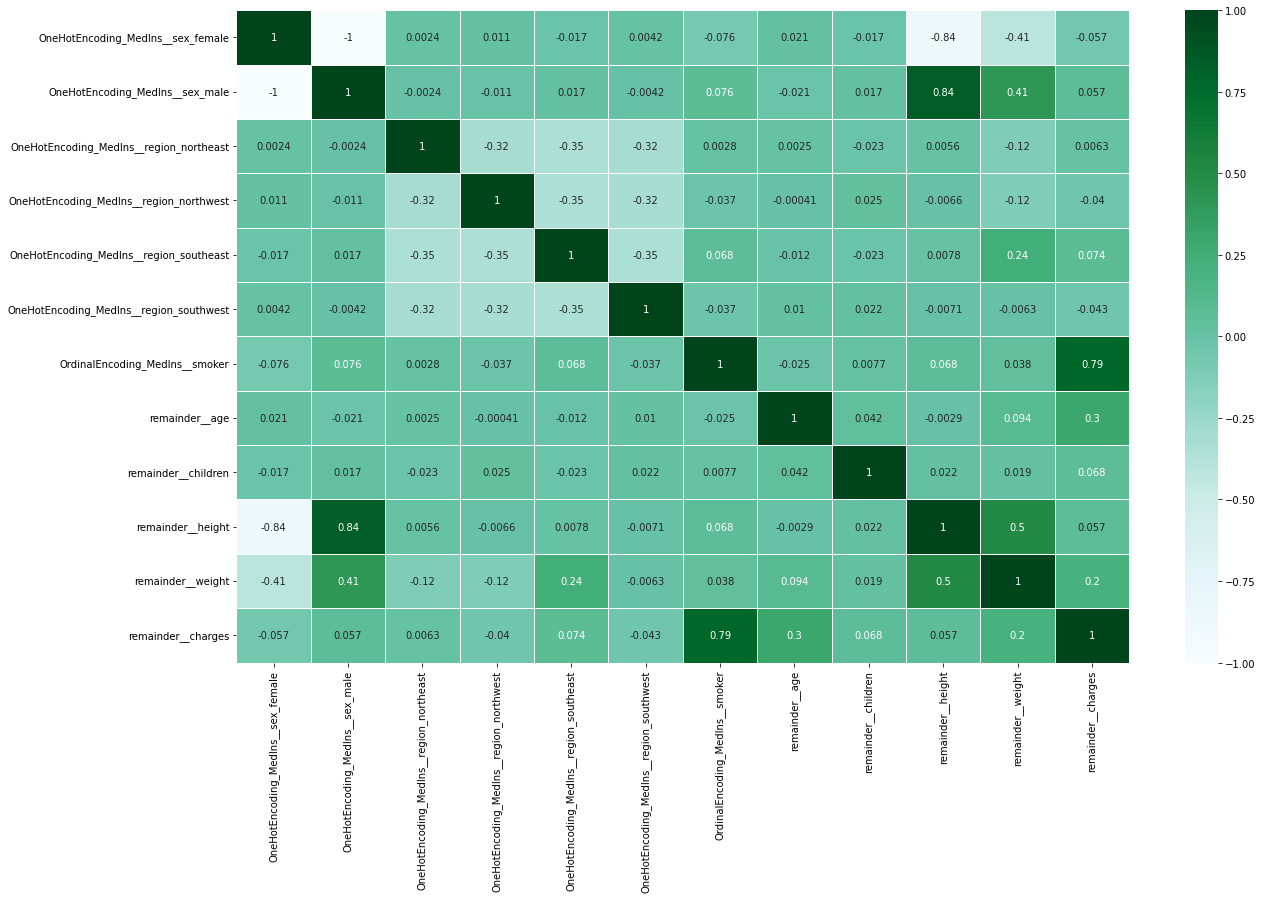

In [21]:
# Once the dataframe contains only numerical features, we can calculate the correlations
correlation_df = df_MedIns_transform.corr()

# Plot the correlations in the form of a heatmap 
fig, ax = plt.subplots(figsize = (20,12))
sns.heatmap(correlation_df, annot = True, cmap = 'BuGn', linewidths=0.5)
plt.show()

##### Conclusions:
- `charges` is most *strongly correlated* with `smoker`, followed by `age` and `weight`
- `OneHotEncoding_MedIns_sex_female` and `OneHotEncoding_MedIns_sex_male` are perfectly *negatively correlated* hence we can only use one of the features and the model won't suffer
- The regional information doesn't show strong correlation with the target feature
- `OneHotEncoding_MedIns_sex_male` is strongly positively correlated with `height`, indicating we might only need to use one of the features
- `height` and `weight` have a moderately strong correlation of 0.5. We can investigate a way of combining both features into a mixture variable

---
### Medical Insurance - Feature Engineering and Correlation Analysis Part 2:
We can conduct some further Feature Engineering, followed by a revisited Correlation Analysis. We plan to:
- Feature Engineer a **'BMI'** column, where BMI is calculated as $\frac{weight}{height^2}$ for `weight` in kg, and height in metres (Currently `height` is measured in cm, so you will need to adjust the formula***)
- Feature Engineer an **'Obese'** column by binning the **'BMI'** values by the following conditions:
    - Obese = 1 if bmi >30, otherwise Obese = 0
- Create a new column **Obese_Smoker** which has 4 categories:
    - **'Obese_Smoker'** if the individual is both obese and a smoker
    - **'Not_Obese_Not_Smoker'** if the individual is neither obese nor a smoker
    - **'Obese_Not_Smoker'** if the individual is obese but NOT a smoker
    - **'Not_Obese_Smoker'** if the individual is a smoker but NOT obese
- Finally, pre-process all categorical columns in `df` (this time including the **'obese_smoker'** column) using `ColumnTransformer`
- Re-do the Correlation Analysis

In [22]:
# Feature Engineering 3 new features:
# 1) BMI 
# 2) Obese
# 3) Obese_Smoker
df['BMI'] = (df['weight']*10000)/(df['height']**2)
df['Obese'] = df['BMI'].map(lambda x: 1 if x>30 else 0)

def feature(row):
    if (row['Obese'] == 1)&(row['smoker'] == 'yes'):
        val = 'Obese_Smoker'
    elif (row['Obese'] == 1)&(row['smoker'] == 'no'):
        val = 'Obese_Not_Smoker'
    elif (row['Obese'] == 0)&(row['smoker'] == 'no'):
        val = 'Not_Obese_Not_Smoker'
    else:
        val = 'Not_Obese_Smoker'
    return val
df['Obese_Smoker'] = df.apply(feature, axis = 1)

df.head()

,age,sex,children,smoker,region,height,weight,charges,BMI,Obese,Obese_Smoker
0,19,female,0,yes,southwest,163.205209,74.314273,16884.9240,27.90,0,Not_Obese_Smoker
1,24,female,0,no,southwest,163.695584,60.559512,2457.5020,22.60,0,Not_Obese_Not_Smoker
2,49,female,1,no,northwest,157.734039,56.253742,9566.9909,22.61,0,Not_Obese_Not_Smoker
3,51,female,2,no,northwest,162.208934,96.485144,10848.1343,36.67,1,Obese_Not_Smoker
4,58,female,0,no,northwest,175.008617,102.420085,12231.6136,33.44,1,Obese_Not_Smoker


In [23]:
# Building a Column Transformer
MedIns_Col_Transformer2 = ColumnTransformer(
    [
        ('OneHotEncoding_MedIns2', OneHotEncoder(), ['sex', 'region', 'Obese_Smoker']),
        ('OrdinalEncoding_MedIns2', OrdinalEncoder(), ['smoker'])
    ],
    remainder = 'passthrough'
)


# Fit and Transform the data
MedIns_Col_Transformer2.fit(df)
df_MedIns_transform2 = MedIns_Col_Transformer2.transform(df)
df_MedIns_transform2 = pd.DataFrame(df_MedIns_transform2, columns = MedIns_Col_Transformer2.get_feature_names_out())

# 5) Take a peak at the transformed dataframe
df_MedIns_transform2.head()

,OneHotEncoding_MedIns2__sex_female,OneHotEncoding_MedIns2__sex_male,OneHotEncoding_MedIns2__region_northeast,OneHotEncoding_MedIns2__region_northwest,OneHotEncoding_MedIns2__region_southeast,OneHotEncoding_MedIns2__region_southwest,OneHotEncoding_MedIns2__Obese_Smoker_Not_Obese_Not_Smoker,OneHotEncoding_MedIns2__Obese_Smoker_Not_Obese_Smoker,OneHotEncoding_MedIns2__Obese_Smoker_Obese_Not_Smoker,OneHotEncoding_MedIns2__Obese_Smoker_Obese_Smoker,OrdinalEncoding_MedIns2__smoker,remainder__age,remainder__children,remainder__height,remainder__weight,remainder__charges,remainder__BMI,remainder__Obese
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,19.0,0.0,163.205209,74.314273,16884.9240,27.90,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,24.0,0.0,163.695584,60.559512,2457.5020,22.60,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0,1.0,157.734039,56.253742,9566.9909,22.61,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,51.0,2.0,162.208934,96.485144,10848.1343,36.67,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,0.0,175.008617,102.420085,12231.6136,33.44,1.0


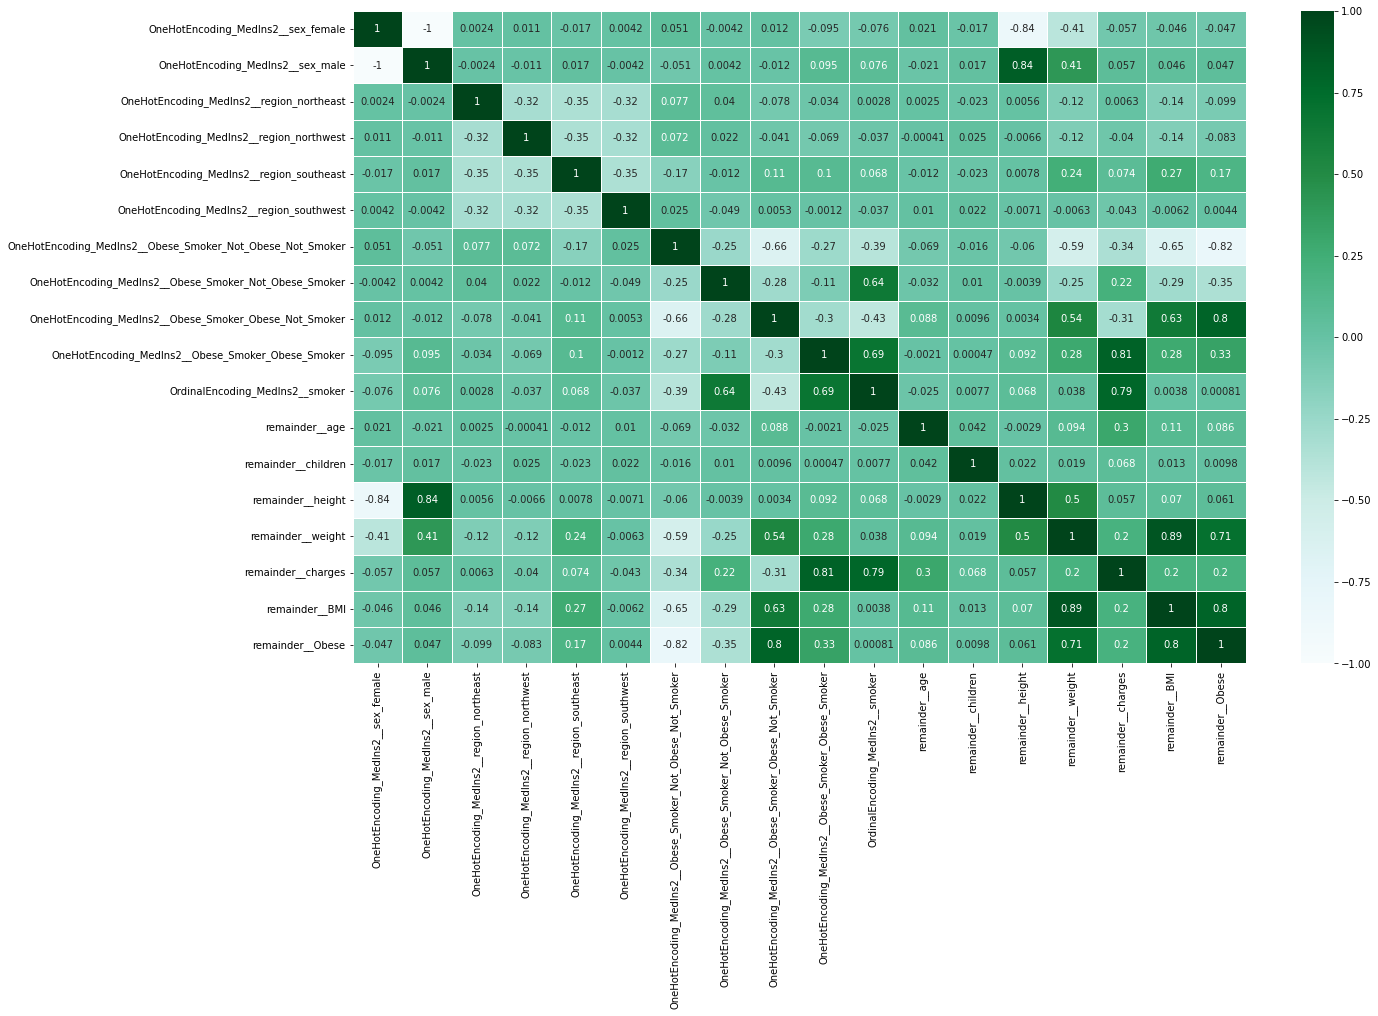

In [24]:
# Correlation Analysis and Visualising as a Heatmap
correlation_df2 = df_MedIns_transform2.corr()

fig, ax = plt.subplots(figsize = (20,12))
sns.heatmap(correlation_df2, annot = True, cmap = 'BuGn', linewidths=0.5)
plt.show()

##### Conclusions: 
- Uncovered a new *highly correlated feature* with medical charges, namely `Obese_Smoker` 
- Obese and individuals who Smoke are prone to having *higher* medical charges
- In contrast, *Not* Obese Non-Smokers have a **negative correlation** with medical charges
- Many features are strongly correlated between each other, meaning careful feature selection is required before the modelling stage

### Medical Insurance: Regression model after Pre-Processing and Feature Engineering:
We can build a Regression Model using the new feature engineered variables. We can follow the following steps:

- Carry out any Feature Selection
- Split the data into a Training and Test dataset
- Perform any Data Pre-processing with `sklearn` and `ColumnTransformer`, ensuring to pre-process both **categorical and numerical** features
- Follow the stages of the **Fit-Transform Workflow**
- Train, Test and Evaluate the model performance

In [25]:
df

,age,sex,children,smoker,region,height,weight,charges,BMI,Obese,Obese_Smoker
0,19,female,0,yes,southwest,163.205209,74.314273,16884.92400,27.900,0,Not_Obese_Smoker
1,24,female,0,no,southwest,163.695584,60.559512,2457.50200,22.600,0,Not_Obese_Not_Smoker
2,49,female,1,no,northwest,157.734039,56.253742,9566.99090,22.610,0,Not_Obese_Not_Smoker
3,51,female,2,no,northwest,162.208934,96.485144,10848.13430,36.670,1,Obese_Not_Smoker
4,58,female,0,no,northwest,175.008617,102.420085,12231.61360,33.440,1,Obese_Not_Smoker
...,...,...,...,...,...,...,...,...,...,...,...
1333,60,male,0,no,northeast,186.558587,128.618575,12741.16745,36.955,1,Obese_Not_Smoker
1334,21,male,0,no,northwest,180.515432,120.111336,1917.31840,36.860,1,Obese_Not_Smoker
1335,29,male,3,no,northeast,181.896026,74.493499,5209.57885,22.515,0,Not_Obese_Not_Smoker
1336,26,male,0,no,northwest,176.356741,54.956704,2680.94930,17.670,0,Not_Obese_Not_Smoker


In [26]:
# Feature Selection
# For this model, we will be using features 'obese_smoker' , 'age', 'sex'
X = df[['age', 'sex', 'Obese_Smoker']]
y = df['charges']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

# Data Pre-Processing 
# Here we are standardising age, and OHE sex and obese_smoker
MedIns_Col_Transformer3 = ColumnTransformer(
    [
        ('scaler', StandardScaler(), ['age']),
        ('OneHotEncoding_MedIns3', OneHotEncoder(), ['sex', 'Obese_Smoker']),
    ],
    remainder = 'passthrough'
)

# Fit ColumnTransformer on training data
MedIns_Col_Transformer3.fit(X_train)

# Transform both of the Train and Test datasets
X_transform_train = pd.DataFrame(MedIns_Col_Transformer3.transform(X_train), columns = MedIns_Col_Transformer3.get_feature_names_out())
X_transform_test = pd.DataFrame(MedIns_Col_Transformer3.transform(X_test), columns=MedIns_Col_Transformer3.get_feature_names_out())

# Initialise Linear Regression Model
LinearModel4 = LinearRegression()

# Fit LinearModel4 to train data
LinearModel4.fit(X_transform_train,y_train)

# Test LinearModel4 on test data
y_pred = LinearModel4.predict(X_transform_test)

# Evaluate LinearModel4 performance
MAE_transformed_data_MedIns = mean_absolute_error(y_test, y_pred)
MSE_transformed_data_MedIns = mean_squared_error(y_test, y_pred)
R2_SCORE_transformed_data_MedIns = r2_score(y_test, y_pred)

print(f'MSE is {MSE_transformed_data_MedIns:.4f}')
print(f'RMSE is {MSE_transformed_data_MedIns**0.5:.4f}')
print(f'MAE is {MAE_transformed_data_MedIns:.4f}')
print(f'R-squared is {R2_SCORE_transformed_data_MedIns:.4f}')

MSE is 16570549.5173
RMSE is 4070.6940
MAE is 2396.1449
R-squared is 0.8938
